In [26]:
import pandas as pd

In [27]:
kaggle_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings.csv')

In [28]:
kaggle_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

- ID should be numeric 
- release_date should be datetime
- video should be boolean
- adult should be boolean
- popularity should be numeric
- budget should be numeric


### To convert video and adult columns to boolean

We want to check that all values are either true or false

In [29]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

To remove bad data 

In [30]:
# Here is the data entries that are not either dalse or true
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As it can be seen this 3 data entries are corrupted. Columns were switched and there's no imdb id. We are going to drop them also with the adult films (that are marked as true)

In [31]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')
kaggle_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45454 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45454 non-null  object 
 2   genres                 45454 non-null  object 
 3   homepage               7777 non-null   object 
 4   id                     45454 non-null  object 
 5   imdb_id                45437 non-null  object 
 6   original_language      45443 non-null  object 
 7   original_title         45454 non-null  object 
 8   overview               44500 non-null  object 
 9   popularity             45451 non-null  object 
 10  poster_path            45068 non-null  object 
 11  production_companies   45451 non-null  object 
 12  production_countries   45451 non-null  object 
 13  release_date           45368 non-null  object 
 14  revenue                45451 non-null  float64
 15  ru

As we can see, there are only 45454 entries now when before we had 45466

### Now for the video column

In [32]:
kaggle_metadata['video'].value_counts() # as tehre are only true and falses, we can convert it to boolean easily

False    45358
True        93
Name: video, dtype: int64

In [33]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

#kaggle_metadata['video'] == 'True'  this line of code creates the boolean column we want. So we assign it back

### For the numeric columns we can just use the to_numeric method from pandas

We'll make sure the `errors=` argument is set to 'raise', so we'll know if there's any data that can't be converted to numbers.

In [38]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [39]:
kaggle_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45454 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45454 non-null  int64  
 2   genres                 45454 non-null  object 
 3   homepage               7777 non-null   object 
 4   id                     45454 non-null  int64  
 5   imdb_id                45437 non-null  object 
 6   original_language      45443 non-null  object 
 7   original_title         45454 non-null  object 
 8   overview               44500 non-null  object 
 9   popularity             45451 non-null  float64
 10  poster_path            45068 non-null  object 
 11  production_companies   45451 non-null  object 
 12  production_countries   45451 non-null  object 
 13  release_date           45368 non-null  object 
 14  revenue                45451 non-null  float64
 15  ru

### Release date

As it is in a standard format, the `to_datetime()` pandas method will convert it easily

In [40]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [42]:
kaggle_metadata.info() # Everything good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45454 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4491 non-null   object        
 1   budget                 45454 non-null  int64         
 2   genres                 45454 non-null  object        
 3   homepage               7777 non-null   object        
 4   id                     45454 non-null  int64         
 5   imdb_id                45437 non-null  object        
 6   original_language      45443 non-null  object        
 7   original_title         45454 non-null  object        
 8   overview               44500 non-null  object        
 9   popularity             45451 non-null  float64       
 10  poster_path            45068 non-null  object        
 11  production_companies   45451 non-null  object        
 12  production_countries   45451 non-null  object        
 13  r

# Lastly, take a look at the ratings data

In [45]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [44]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


For our own analysis, we won't be using the timestamp column; however, we will be storing the rating data as its own table in SQL, so we'll need to convert it to a datetime data type. From the MovieLens documentation, the timestamp is the number of seconds since midnight of January 1, 1970.

SO THE ONLY THING WE HAVE TO DO IS CHANGE THE TIMESTAMP COLUMN TO DATETIME DTYPE

In [46]:
pd.to_datetime(ratings['timestamp'], unit='s')


0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [49]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36


To check if the data type was changed

In [50]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 794.2 MB


## Check if the ratings are statistically fine

In [52]:
ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

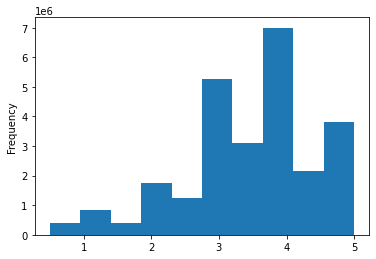

In [53]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

That seems to make sense. People are more likely to give whole number ratings than half, which explains the spikes in the histogram. The median score is 3.5, the mean is 3.53, and all the ratings are between 0 and 5.